<a href="https://colab.research.google.com/github/Ali-Saud/ML-in-PE/blob/master/Nestor-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('nasdaq-31-y.csv')
print(df.head())

         Date        Open        High  ...       Close   Adj Close     Volume
0  1990-08-01  437.700012  438.600006  ...  435.899994  435.899994  128980000
1  1990-08-02  430.200012  433.399994  ...  428.899994  428.899994  146540000
2  1990-08-03  423.500000  428.299988  ...  417.500000  417.500000  203170000
3  1990-08-06  403.700012  414.600006  ...  400.000000  400.000000  174810000
4  1990-08-07  401.100006  406.600006  ...  402.100006  402.100006  165470000

[5 rows x 7 columns]


In [4]:
print(df.tail(15))

            Date          Open  ...     Adj Close      Volume
7801  2021-07-20  14330.459961  ...  14498.879883  4618980000
7802  2021-07-21  14508.750000  ...  14631.950195  4075150000
7803  2021-07-22  14652.719727  ...  14684.599609  3574560000
7804  2021-07-23  14753.059570  ...  14836.990234  3959410000
7805  2021-07-26  14821.030273  ...  14840.709961  4409960000
7806  2021-07-27  14807.950195  ...  14660.580078  4300000000
7807  2021-07-28  14715.660156  ...  14762.580078  4235390000
7808  2021-07-29  14771.169922  ...  14778.259766  3904590000
7809  2021-07-30  14615.849609  ...  14672.679688  3628750000
7810  2021-08-02  14758.599609  ...  14681.070313  3738200000
7811  2021-08-03  14713.990234  ...  14761.290039  4117520000
7812  2021-08-04  14747.209961  ...  14780.530273  4319400000
7813  2021-08-05  14794.080078  ...  14895.120117  4087320000
7814  2021-08-06  14864.219727  ...  14835.759766  4159050000
7815  2021-08-09  14855.759766  ...  14860.179688  4095760000

[15 row

In [60]:
cols = list(df)[1:7]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


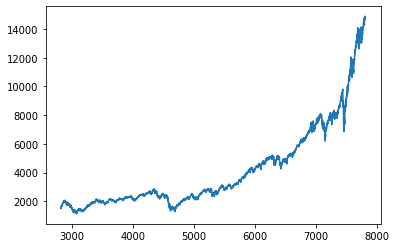

In [62]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

df_for_plot=df_for_training['Close'].tail(5000)
df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [82]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (7811, 5, 6).
trainY shape == (7811, 1).


In [83]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 5, 64)             18176     
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
110/110 [==============================] - 3s 10ms/step - loss: 0.0657 - val_loss: 0.8871
Epoch 2/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0106 - val_loss: 0.0164
Epoch 3/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0083 - val_loss: 0.0734
Epoch 4/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0091 - val_loss: 0.0329
Epoch 5/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0082 - val_loss: 0.0200
Epoch 6/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0080 - val_loss: 0.0176
Epoch 7/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0080 - val_loss: 0.0149
Epoch 8/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0082 - val_loss: 0.0459
Epoch 9/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0078 - val_loss: 0.0241
Epoch 10/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0080 - val_loss: 0.088

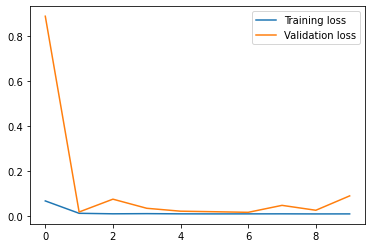

In [84]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [85]:
print(history.history['loss'])
#print(history.history['acc'])

[0.06565570831298828, 0.010567246936261654, 0.00834928173571825, 0.009073317982256413, 0.008181863464415073, 0.007955419830977917, 0.008039498701691628, 0.008231613785028458, 0.007849852554500103, 0.007954253815114498]


In [86]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
train_dates = pd.to_datetime(df['Date'])
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 14
n_days_for_prediction=1  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2021-07-21 00:00:00', freq='C')]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


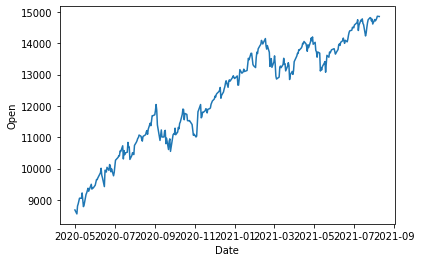

In [87]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])